In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [5]:
# 讀取資料集
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.groupby(('job', 'y')).size()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64

In [250]:
df[(df['job'] == 'student') & (df['month'] == 'jul') & (df['day_of_week'] == 'thu')].loc[40161, :]

age                     20
job                student
marital             single
education         basic.9y
default                 no
housing                yes
loan                    no
contact           cellular
month                  jul
day_of_week            thu
duration               361
campaign                 3
pdays                    6
previous                 3
poutcome           success
emp.var.rate          -1.7
cons.price.idx      94.215
cons.conf.idx        -40.3
euribor3m            0.846
nr.employed         4991.6
y                      yes
Name: 40161, dtype: object

In [7]:
pd.crosstab(index=df['education'], columns=df['y']).apply(lambda x: x/x.sum(), axis=1)

y,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


In [8]:
pd.crosstab(index=df['education'], columns=df['y']).apply(np.mean, axis=1)

education
basic.4y               2088.0
basic.6y               1146.0
basic.9y               3022.5
high.school            4757.5
illiterate                9.0
professional.course    2621.5
university.degree      6084.0
unknown                 865.5
dtype: float64

In [7]:
def data_overview():
    print('Rows:', df.shape[0])
    print('Columns:', df.shape[1])
    print('Missing Number Total', df.isnull().sum().values.sum())
    for c in df.columns:
        print('{:15}: '.format(c), df.loc[:,c].nunique(), '\t', df.loc[:, c].unique()[:5])

data_overview()

Rows: 41188
Columns: 21
Missing Number Total 0
age            :  78 	 [56 57 37 40 45]
job            :  12 	 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician']
marital        :  4 	 ['married' 'single' 'divorced' 'unknown']
education      :  8 	 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course']
default        :  3 	 ['no' 'unknown' 'yes']
housing        :  3 	 ['no' 'yes' 'unknown']
loan           :  3 	 ['no' 'yes' 'unknown']
contact        :  2 	 ['telephone' 'cellular']
month          :  10 	 ['may' 'jun' 'jul' 'aug' 'oct']
day_of_week    :  5 	 ['mon' 'tue' 'wed' 'thu' 'fri']
duration       :  1544 	 [261 149 226 151 307]
campaign       :  42 	 [1 2 3 4 5]
pdays          :  27 	 [999   6   4   3   5]
previous       :  8 	 [0 1 2 3 4]
poutcome       :  3 	 ['nonexistent' 'failure' 'success']
emp.var.rate   :  10 	 [ 1.1  1.4 -0.1 -0.2 -1.8]
cons.price.idx :  26 	 [93.994 94.465 93.918 93.444 93.798]
cons.conf.idx  :  26 	 [-36.4 -41.8 -42.7 -36.1 -40.

In [11]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
df[df['job'] == 'unknown'][['job', 'y']].groupby(('job', 'y')).size()

job      y  
unknown  no     293
         yes     37
dtype: int64

In [131]:
df = df[df['job'] != 'unknown']

In [214]:
df = df.replace({'yes': 1, 'no': 0})

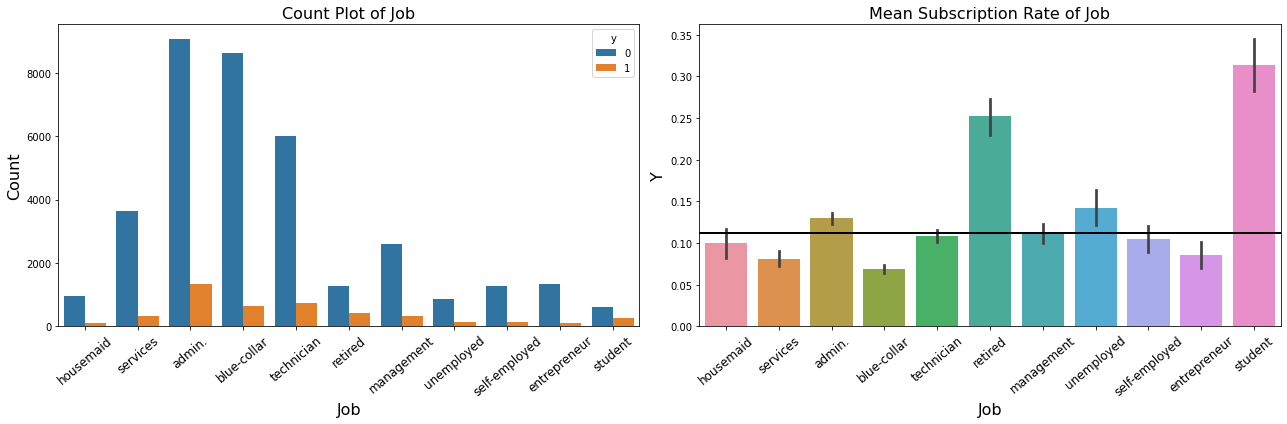

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='job', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Job', fontsize=16)
ax[0].set_xlabel('Job', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df['job'].unique(), rotation=40, fontsize=12)
sns.barplot(x='job', y='y', data=df, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of Job', fontsize=16)
ax[1].set_xlabel('Job', fontsize=16)
ax[1].set_ylabel('Y', fontsize=16)
ax[1].set_xticklabels(df['job'].unique(), rotation=40, fontsize=12)
plt.tight_layout()
plt.savefig('Job.png')
plt.show()

In [30]:
df['education'] = df['education'].replace({'unknown': 'university.degree'})

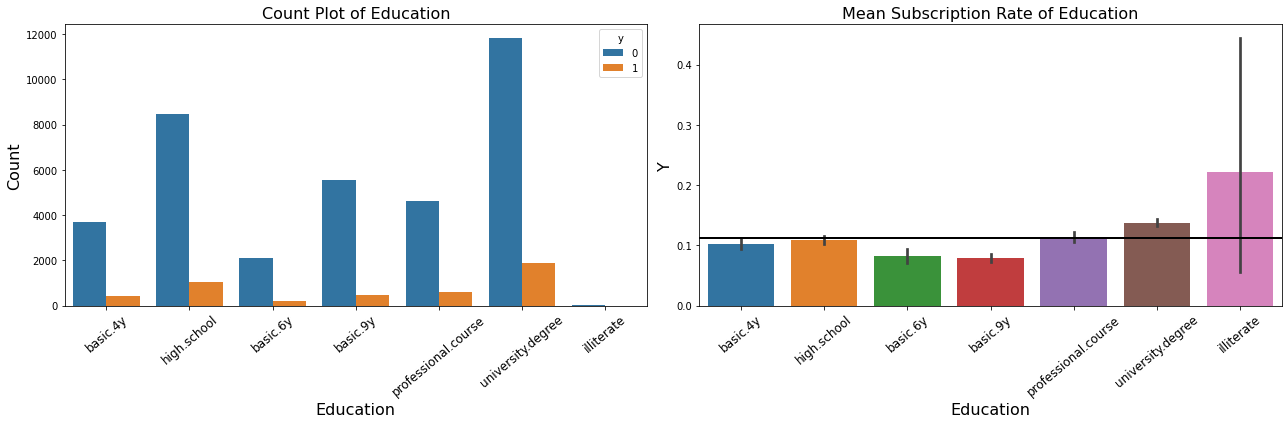

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.countplot(x='education', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Education', fontsize=16)
ax[0].set_xlabel('Education', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df['education'].unique(), rotation=40, fontsize=12)
sns.barplot(x='education', y='y', data=df, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of Education', fontsize=16)
ax[1].set_xlabel('Education', fontsize=16)
ax[1].set_ylabel('Y', fontsize=16)
ax[1].set_xticklabels(df['education'].unique(), rotation=40, fontsize=12)
plt.tight_layout()
plt.savefig('Education.png')
plt.show()

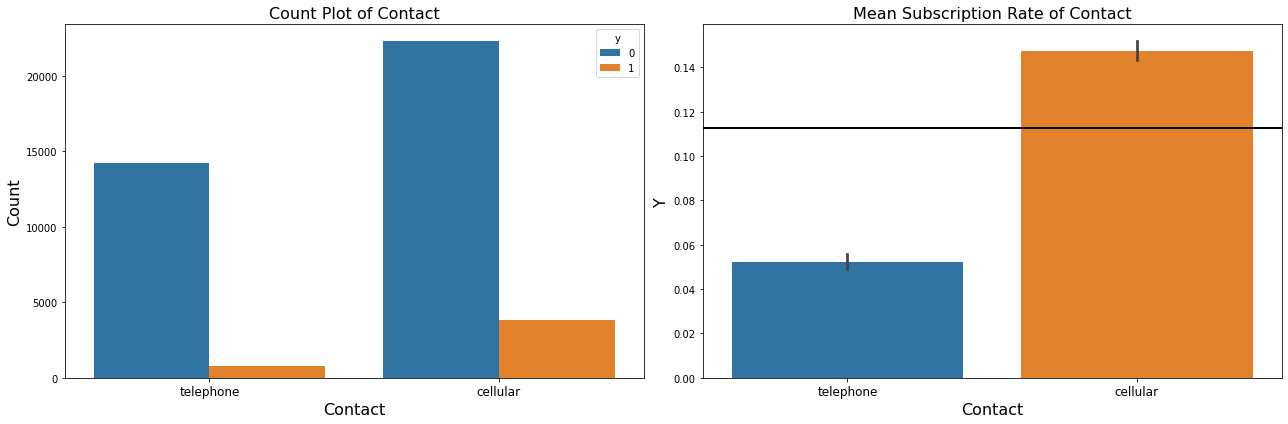

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='contact', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Contact', fontsize=16)
ax[0].set_xlabel('Contact', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df['contact'].unique(), fontsize=12)
sns.barplot(x='contact', y='y', data=df, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of Contact', fontsize=16)
ax[1].set_xlabel('Contact', fontsize=16)
ax[1].set_ylabel('Y', fontsize=16)
ax[1].set_xticklabels(df['contact'].unique(), fontsize=12)
plt.tight_layout()
plt.savefig('Contact.png')
plt.show()

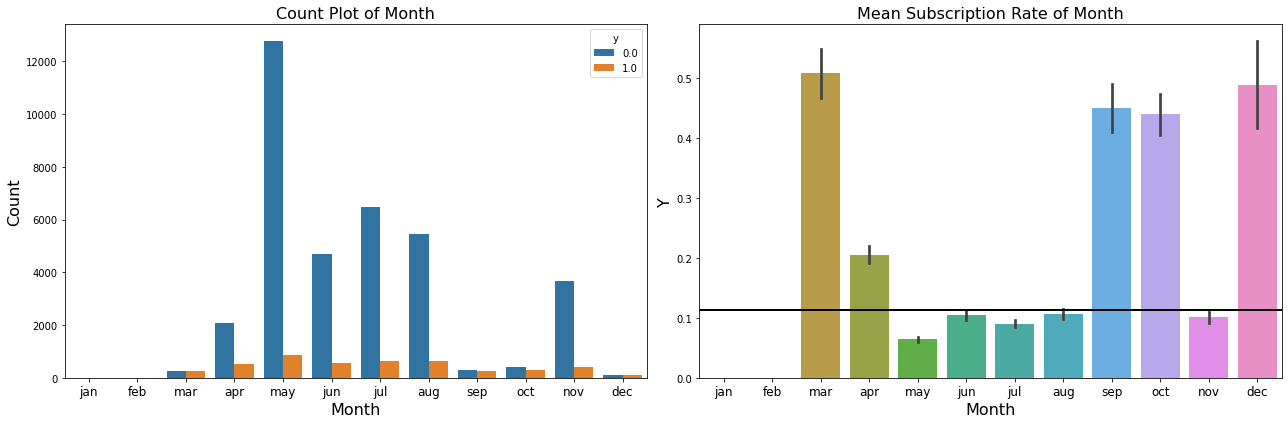

In [133]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_month_inorder = df.set_index('month').loc[month_order].reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='month', hue='y', data=df_month_inorder, ax=ax[0])
ax[0].set_title('Count Plot of Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df_month_inorder['month'].unique(), fontsize=12)
sns.barplot(x='month', y='y', data=df_month_inorder, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=16)
ax[1].set_ylabel('Y', fontsize=16)
ax[1].set_xticklabels(df_month_inorder['month'].unique(), fontsize=12)
plt.tight_layout()
plt.savefig('Month.png')
plt.show()

In [139]:
df.set_index('month').loc[month_order]

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,,,,,,,,,,,
jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mar,26.0,student,single,basic.9y,0,1,0,cellular,mon,712.0,4.0,0,0.0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1.0
mar,38.0,admin.,single,university.degree,0,1,0,cellular,mon,111.0,2.0,0,0.0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1.0
mar,26.0,student,single,basic.9y,0,0,0,cellular,mon,42.0,4.0,0,0.0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dec,51.0,blue-collar,married,professional.course,0,1,0,cellular,wed,241.0,3.0,0,0.0,nonexistent,-3.0,92.713,-33.0,0.700,5023.5,1.0
dec,31.0,student,married,high.school,0,1,0,cellular,wed,158.0,3.0,0,0.0,nonexistent,-3.0,92.713,-33.0,0.700,5023.5,0.0
dec,39.0,admin.,married,high.school,0,1,0,cellular,wed,110.0,3.0,0,1.0,failure,-3.0,92.713,-33.0,0.700,5023.5,0.0


[Text(0, 0, 'jan'),
 Text(0, 0, 'feb'),
 Text(0, 0, 'mar'),
 Text(0, 0, 'apr'),
 Text(0, 0, 'may'),
 Text(0, 0, 'jun'),
 Text(0, 0, 'jul'),
 Text(0, 0, 'aug'),
 Text(0, 0, 'sep'),
 Text(0, 0, 'oct'),
 Text(0, 0, 'nov'),
 Text(0, 0, 'dec')]

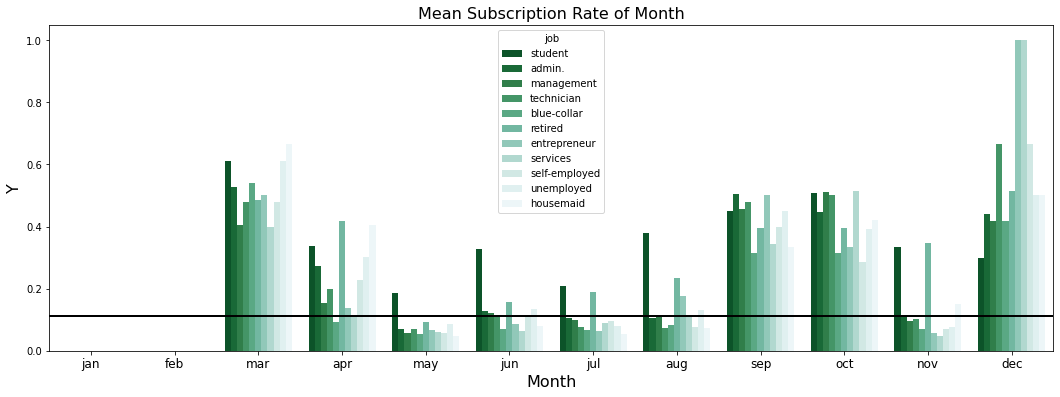

In [141]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x='month', y='y', hue='job', data=df_month_inorder, ax=ax, ci=None, palette='BuGn_r')
ax.axhline(y=df['y'].mean(), linewidth=2, c='k')
ax.set_title('Mean Subscription Rate of Month', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_xticklabels(df_month_inorder['month'].unique(), fontsize=12)

Text(87.0, 0.5, 'Month')

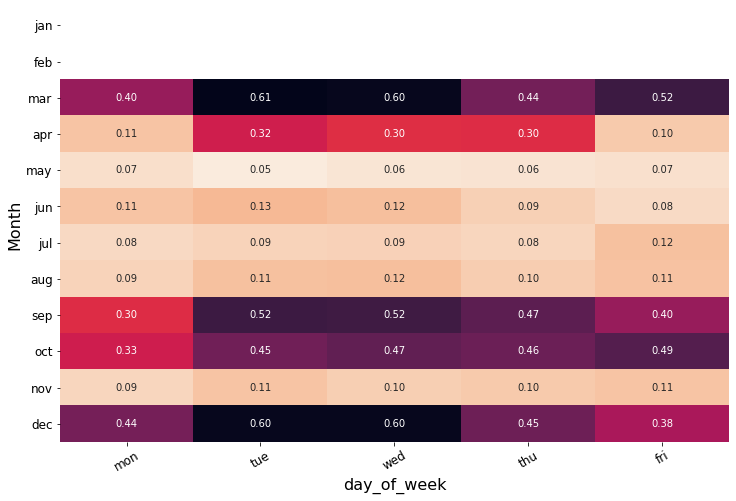

In [160]:
day_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri']
cmap = sns.cm.rocket_r

plt.figure(figsize=(12, 8))
sns.heatmap(pd.pivot_table(index='month', columns='day_of_week', values='y', data=df_month_inorder).loc[month_order, day_of_week_order], 
            annot=True, fmt='.2f', cmap=cmap, cbar=False)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('day_of_week', fontsize=16)
plt.ylabel('Month', fontsize=16)

Text(87.0, 0.5, 'Month')

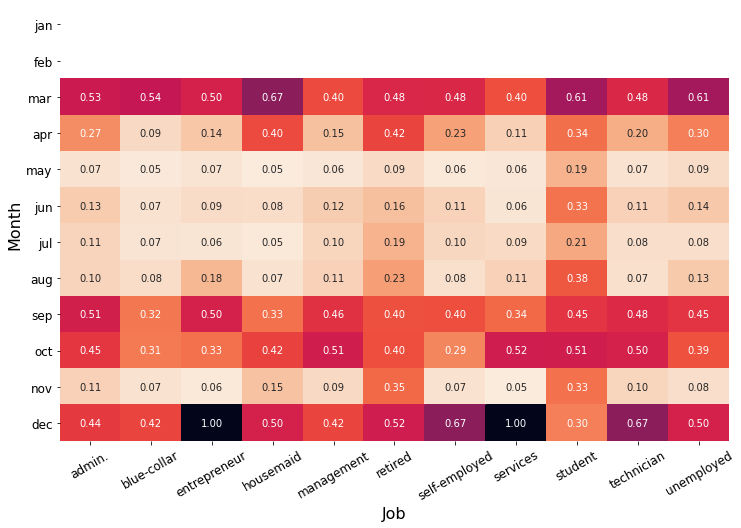

In [158]:
cmap = sns.cm.rocket_r

plt.figure(figsize=(12, 8))
sns.heatmap(pd.pivot_table(index='month', columns='job', values='y', data=df_month_inorder).loc[month_order], 
            annot=True, fmt='.2f', cmap=cmap, cbar=False)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Job', fontsize=16)
plt.ylabel('Month', fontsize=16)

In [164]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [206]:
df[df['job'] == 'entrepreneur']['age'].value_counts()

37    73
38    66
36    64
41    58
35    57
31    56
39    56
50    55
32    54
34    50
42    49
40    48
46    48
45    48
48    47
43    47
33    47
56    47
51    41
44    40
52    39
49    38
29    38
47    36
30    35
55    34
53    32
58    21
28    19
59    18
54    16
57    16
26    14
27    12
60     9
25     8
24     5
69     4
20     4
62     3
23     3
61     1
Name: age, dtype: int64

In [175]:
df_month_inorder.groupby('month')['emp.var.rate'].mean().loc[month_order]

month
jan         NaN
feb         NaN
mar   -1.800000
apr   -1.800000
may   -0.171632
jun    0.691572
jul    1.159941
aug    0.745979
sep   -2.164057
oct   -2.435634
nov   -0.416365
dec   -2.844444
Name: emp.var.rate, dtype: float64

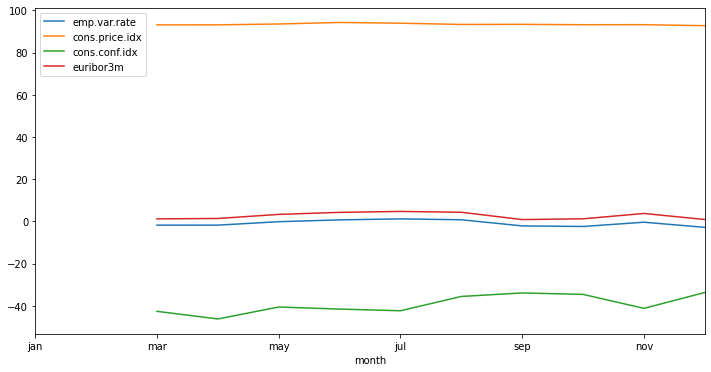

In [177]:
fig, ax = plt.subplots(figsize=(12, 6))
df_month_inorder.groupby('month')['emp.var.rate'].mean().loc[month_order].plot(ax=ax)
df_month_inorder.groupby('month')['cons.price.idx'].mean().loc[month_order].plot(ax=ax)
df_month_inorder.groupby('month')['cons.conf.idx'].mean().loc[month_order].plot(ax=ax)
df_month_inorder.groupby('month')['euribor3m'].mean().loc[month_order].plot(ax=ax)
plt.legend()

In [220]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

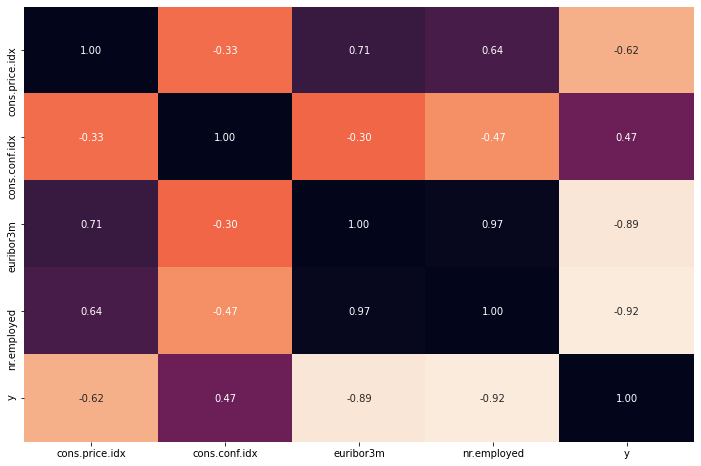

In [239]:
cmap = sns.cm.rocket_r

plt.figure(figsize=(12, 8))
sns.heatmap(df_month_inorder.groupby('month')[['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].mean().corr(), 
            cmap=cmap, annot=True, fmt='.2f', cbar=False)
plt.savefig('Enviromental_Correlation.png')

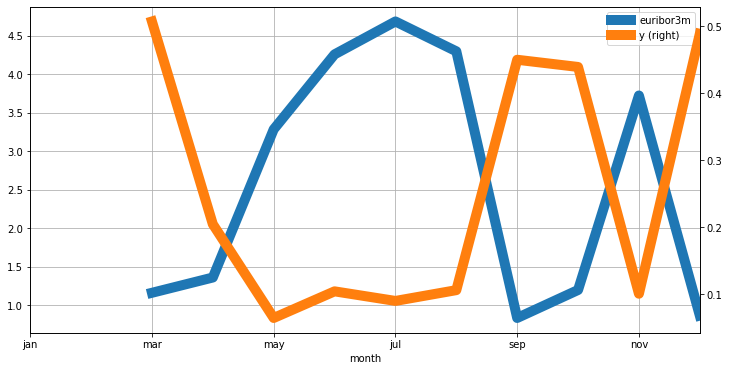

In [217]:
fig, ax = plt.subplots(figsize=(12, 6))
df_month_inorder.groupby('month')['euribor3m'].mean().loc[month_order].plot(ax=ax, legend=True, linewidth=10)
df_month_inorder.groupby('month')['y'].mean().loc[month_order].plot(secondary_y=True, ax=ax,legend=True, linewidth=10)
ax.grid(True)
plt.savefig('Euribor3m.png')


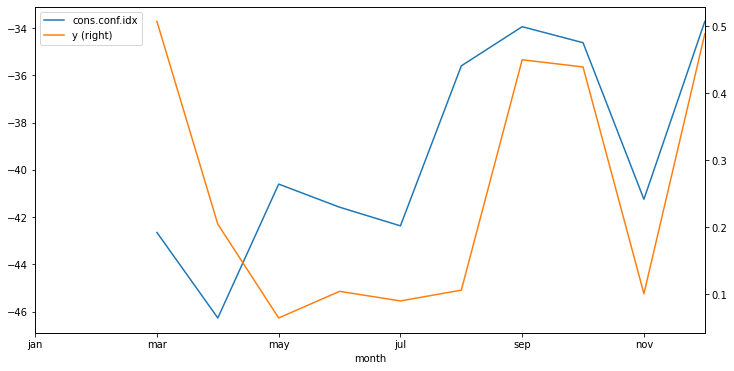

In [187]:
fig, ax = plt.subplots(figsize=(12, 6))
df_month_inorder.groupby('month')['cons.conf.idx'].mean().loc[month_order].plot(ax=ax, legend=True)
df_month_inorder.groupby('month')['y'].mean().loc[month_order].plot(secondary_y=True, ax=ax,legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
df_month_inorder.groupby('month')['cons.conf.idx'].mean().loc[month_order].plot(ax=ax, legend=True)
df_month_inorder.groupby('month')['y'].mean().loc[month_order].plot(secondary_y=True, ax=ax,legend=True)

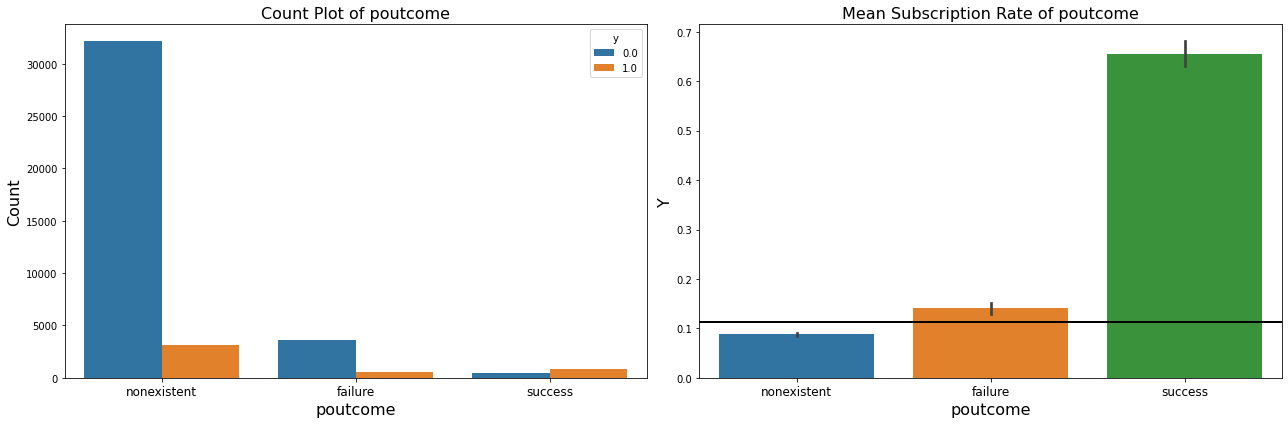

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='poutcome', hue='y', data=df_month_inorder, ax=ax[0])
ax[0].set_title('Count Plot of poutcome', fontsize=16)
ax[0].set_xlabel('poutcome', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df['poutcome'].unique(), fontsize=12)
sns.barplot(x='poutcome', y='y', data=df_month_inorder, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of poutcome', fontsize=16)
ax[1].set_xlabel('poutcome', fontsize=16)
ax[1].set_ylabel('Y', fontsize=16)
ax[1].set_xticklabels(df['poutcome'].unique(), fontsize=12)
plt.tight_layout()
plt.savefig('Poutcome.png')
plt.show()

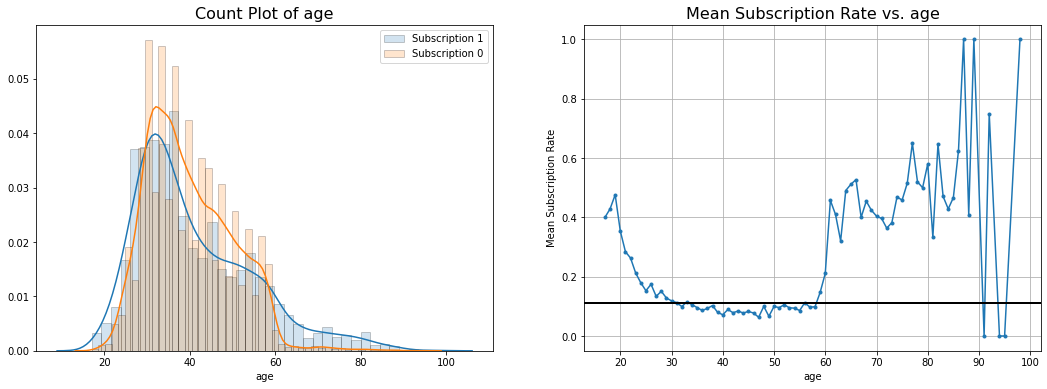

In [47]:
grouped = df[['age', 'y']].groupby('age').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['age'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['age'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of age', fontsize=16)
ax[1].plot(grouped['age'], grouped['y'], '.-')
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate vs. age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.savefig('Age1.png')
plt.show()

In [109]:
df['age_group'] = df['age'].apply(lambda x: 'old' if x >= 60 else 'mid' if x >= 30 else 'low')
df.drop(columns='age', inplace=True)

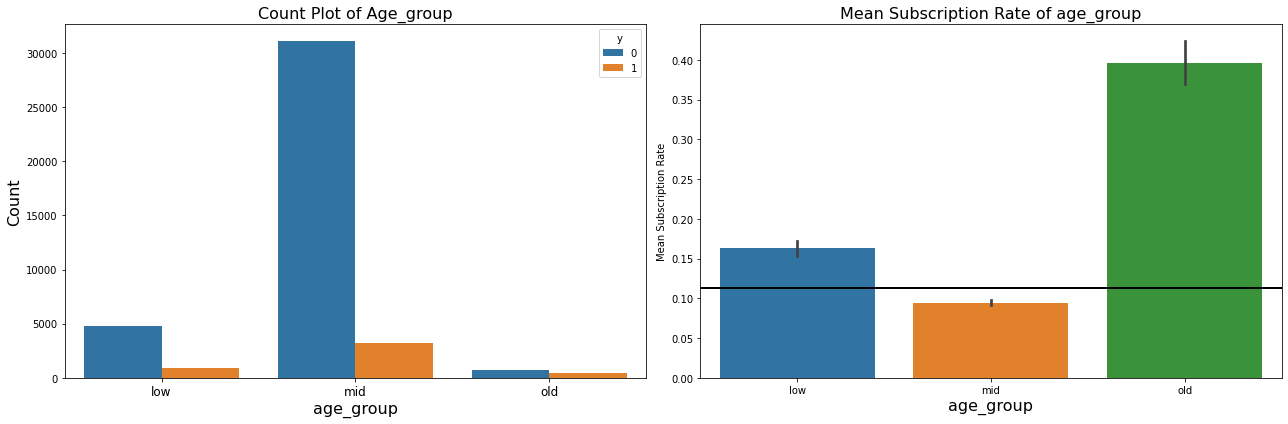

In [113]:
age_order = ['low', 'mid', 'old']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='age_group', hue='y', data=df.set_index('age_group').loc[age_order].reset_index(), ax=ax[0])
ax[0].set_title('Count Plot of Age_group', fontsize=16)
ax[0].set_xlabel('age_group', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df.set_index('age_group').loc[age_order].reset_index()['age_group'].unique(), fontsize=12)
sns.barplot(x='age_group', y='y', data=df.set_index('month').loc[month_order].reset_index(), ax=ax[1])
ax[1].axhline(y=df.set_index('month').loc[month_order].reset_index()['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of age_group', fontsize=16)
ax[1].set_xlabel('age_group', fontsize=16)
ax[1].set_ylabel('Mean Subscription Rate')
plt.tight_layout()
plt.savefig('Age2.png')
plt.show()

In [86]:
df.sort_values(by='pdays')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40534,30,technician,married,professional.course,0,0,0,telephone,aug,wed,...,1,0,4,success,-1.7,94.027,-38.3,0.890,4991.6,0
40376,27,student,single,university.degree,0,1,0,telephone,aug,wed,...,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,0
30417,30,admin.,single,university.degree,0,1,0,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,1
30314,36,admin.,married,university.degree,0,1,0,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,1
40382,30,admin.,single,university.degree,0,1,0,cellular,aug,wed,...,1,0,2,success,-1.7,94.027,-38.3,0.900,4991.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13731,22,blue-collar,single,basic.9y,0,1,0,telephone,jul,thu,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
13732,40,blue-collar,married,basic.4y,unknown,0,0,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,1
13733,29,technician,married,university.degree,0,0,1,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
13675,27,technician,single,university.degree,0,0,0,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


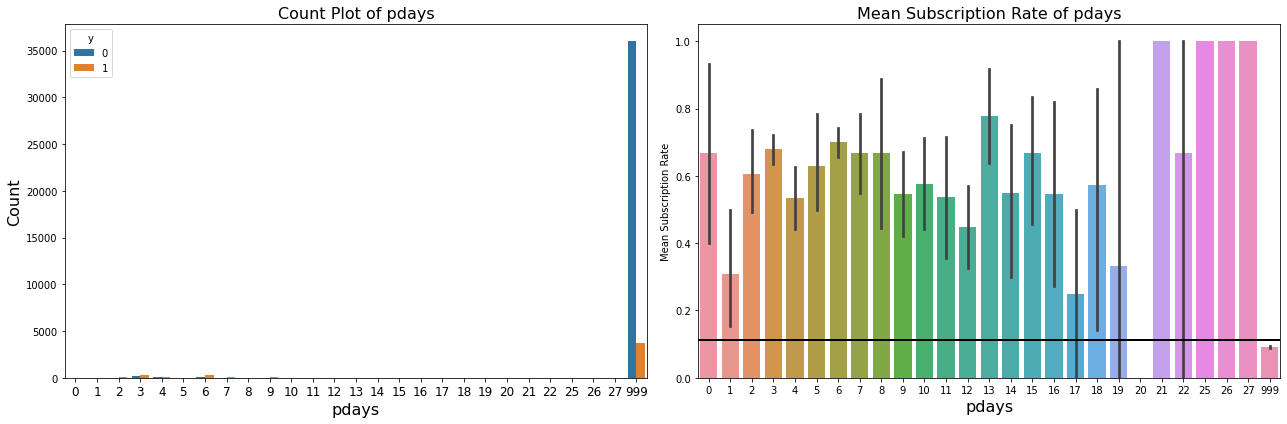

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='pdays', hue='y', data=df.sort_values(by='pdays'), ax=ax[0])
ax[0].set_title('Count Plot of pdays', fontsize=16)
ax[0].set_xlabel('pdays', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df.sort_values(by='pdays')['pdays'].unique(), fontsize=12)
sns.barplot(x='pdays', y='y', data=df, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of pdays', fontsize=16)
ax[1].set_xlabel('pdays', fontsize=16)
ax[1].set_ylabel('Mean Subscription Rate')
plt.tight_layout()
plt.savefig('Pdays1.png')
plt.show()

In [209]:
df['pdays'] = df['pdays'].apply(lambda x: str(x)).replace({'999': '-1'})

In [210]:
df['pdays'] = df['pdays'].apply(lambda x: '1' if int(x) >= 0 else '0')

In [213]:
df[['pdays', 'y']].groupby('pdays')['y'].value_counts()

pdays  y  
0      no     36000
       yes     3673
1      yes      967
       no       548
Name: y, dtype: int64

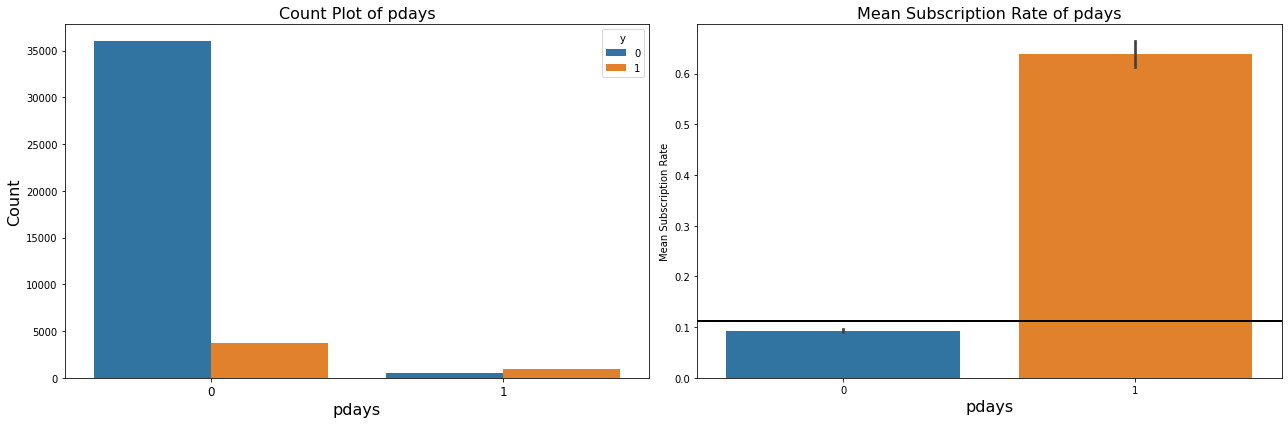

In [215]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='pdays', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of pdays', fontsize=16)
ax[0].set_xlabel('pdays', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xticklabels(df['pdays'].unique(), fontsize=12)
sns.barplot(x='pdays', y='y', data=df, ax=ax[1])
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate of pdays', fontsize=16)
ax[1].set_xlabel('pdays', fontsize=16)
ax[1].set_xlabel('pdays', fontsize=16)
ax[1].set_ylabel('Mean Subscription Rate')
plt.tight_layout()
#plt.savefig('Pdays2.png')
plt.show()

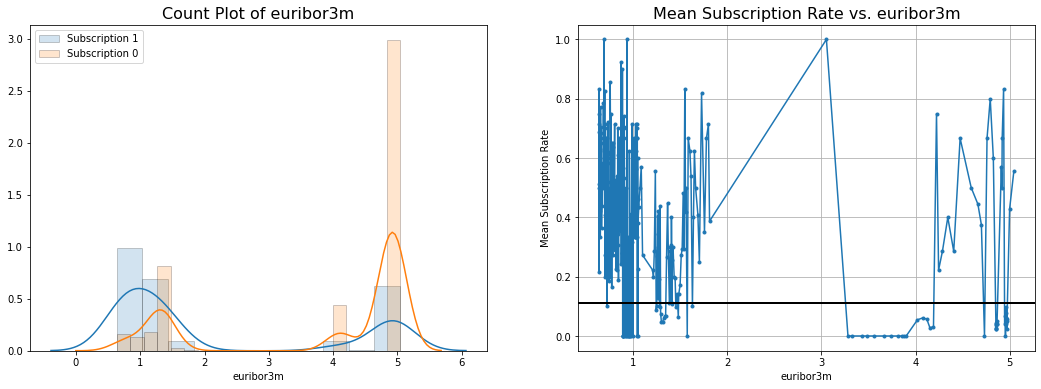

In [101]:
grouped = df[['euribor3m', 'y']].groupby('euribor3m').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['euribor3m'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['euribor3m'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of euribor3m', fontsize=16)
ax[1].plot(grouped['euribor3m'], grouped['y'], '.-')
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate vs. euribor3m', fontsize=16)
ax[1].set_xlabel('euribor3m')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.savefig('Rate.png')
plt.show()

In [96]:
df[df['y'] == 1]['euribor3m']

75       4.857
83       4.857
88       4.857
129      4.857
139      4.857
         ...  
41174    1.031
41178    1.031
41181    1.028
41183    1.028
41186    1.028
Name: euribor3m, Length: 4640, dtype: float64

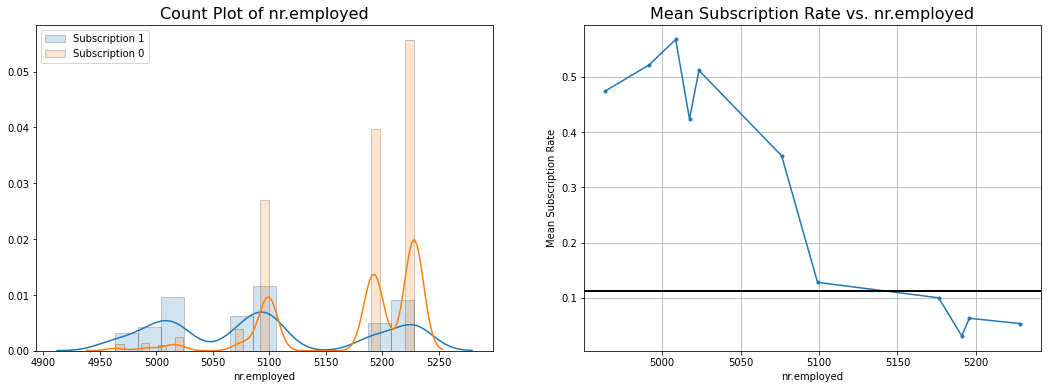

In [104]:
grouped = df[['nr.employed', 'y']].groupby('nr.employed').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['nr.employed'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['nr.employed'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of nr.employed', fontsize=16)
ax[1].plot(grouped['nr.employed'], grouped['y'], '.-')
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate vs. nr.employed', fontsize=16)
ax[1].set_xlabel('nr.employed')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.savefig('NoE.png')
plt.show()

In [227]:
df['campaign'] = df['campaign'] - 1

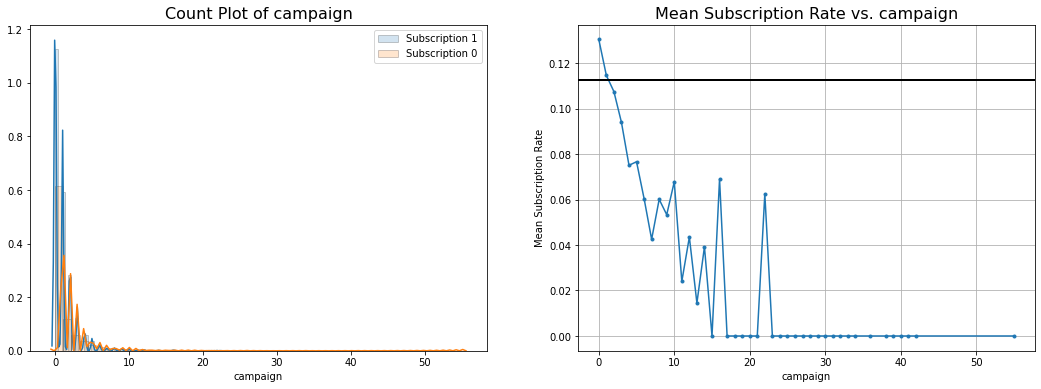

In [228]:
grouped = df[['campaign', 'y']].groupby('campaign').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['campaign'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['campaign'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of campaign', fontsize=16)
ax[1].plot(grouped['campaign'], grouped['y'], '.-')
ax[1].axhline(y=df['y'].mean(), linewidth=2, c='k')
ax[1].set_title('Mean Subscription Rate vs. campaign', fontsize=16)
ax[1].set_xlabel('campaign')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.savefig('Campaign.png')
plt.show()

In [226]:
df[['campaign', 'y']]

,campaign,y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,1,1
41184,1,0
41185,2,0
41186,1,1


In [237]:
s_r_y = pd.DataFrame(df[df['job'].isin(['student', 'retired'])].groupby(['job', 'contact'])['y'].mean())
s_r_y.columns = ['平均認購率']

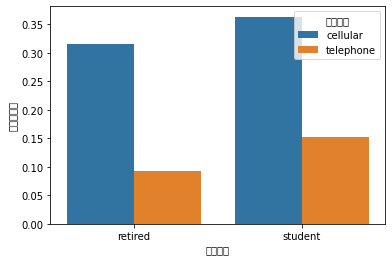

In [236]:
sns.barplot(x='工作型態', y='平均認購率', hue='聯絡方式', data=s_r_y)

In [238]:
s_r_y

平均認購率
job     contact            
retired cellular   0.316003
        telephone  0.092025
student cellular   0.363636
        telephone  0.151961